<a href="https://colab.research.google.com/github/naranjitoct/UPCT_IA_2022/blob/main/DeepLearningKerasTheWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ALL

#All all

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow import keras
import tensorflow
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# As a sanity check, let’s count how many pictures are in each training split (train/validation/test):
import os

train_dir = '/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/train'
validation_dir = '/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/validation'
test_dir = '/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/test'

clases= ['cloudy','foggy','rainy','shine','sunrise']

for word in clases:

  print('training ', word ,' images:', len(os.listdir(train_dir + "/"+word)))
  print('validation ', word ,' images:', len(os.listdir(validation_dir + "/"+word)))
  print('test ', word ,' images:', len(os.listdir(test_dir + "/"+word)))
  print('----')
  

training  cloudy  images: 200
validation  cloudy  images: 50
test  cloudy  images: 50
----
training  foggy  images: 200
validation  foggy  images: 50
test  foggy  images: 50
----
training  rainy  images: 200
validation  rainy  images: 50
test  rainy  images: 50
----
training  shine  images: 150
validation  shine  images: 50
test  shine  images: 50
----
training  sunrise  images: 250
validation  sunrise  images: 50
test  sunrise  images: 50
----


#ALl

In [4]:
for i in range (0,5):
  print(clases[i],'\n')

cloudy 

foggy 

rainy 

shine 

sunrise 



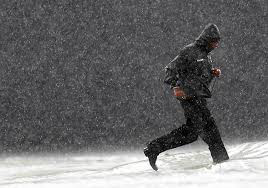

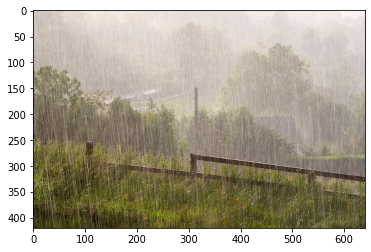

In [5]:
# import image data from file to a numpy array
img=mpimg.imread('/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/test/rainy/rain24.jpeg')
# plot the numpy array
imgplot = plt.imshow(img)

# alternative: use keras.preprocessing.image
from tensorflow.keras.preprocessing import image
img_path = '/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/test/rainy/rain12.jpg' 
img2 = image.load_img(img_path)
img2

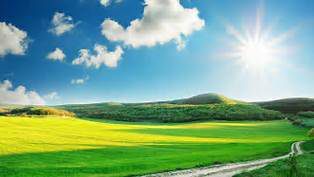

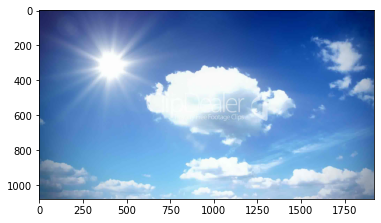

In [6]:
img=mpimg.imread('/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/train/shine/shine121.jpg')
imgplot = plt.imshow(img)
img2 = image.load_img('/content/gdrive/MyDrive/00_Prácticas COLAB IA/DLtest/validation/shine/shine176.jpg' )
img2

In [7]:


train_dataset = image_dataset_from_directory(
    train_dir , 
    labels="inferred", # default: inferred from dir structure
    label_mode="int", # default 
    seed=41,
    image_size=(150, 150),
    shuffle=True, # default
    color_mode="rgb", # default
    batch_size=16)

validation_dataset = image_dataset_from_directory(
    validation_dir , 
    labels="inferred", # default: inferred from dir structure
    label_mode="int", # default
    seed=41,
    image_size=(150, 150),
    shuffle=True, # default
    color_mode="rgb", # default
    batch_size=16)

test_dataset = image_dataset_from_directory(
    test_dir , 
    labels="inferred", # default: inferred from dir structure
    label_mode="int", # default
    seed=41,
    image_size=(150, 150),
    shuffle=True, # default
    color_mode="rgb", # default
    batch_size=16)

Found 1000 files belonging to 5 classes.
Found 250 files belonging to 5 classes.
Found 250 files belonging to 5 classes.


In [8]:
for data_batch, labels_batch in train_dataset:
  print("data_batch shape:", data_batch.shape)
  print("labels_batch shape:", labels_batch.shape)
  break

data_batch shape: (16, 150, 150, 3)
labels_batch shape: (16,)


In [9]:
data_batch.dtype

tf.float32

In [10]:
# import de VGG16 model, trained with the imagenet dataset

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [11]:
print(conv_base.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
print('This is the number of trainable tensor-weights '
    'before freezing the conv base:', len(conv_base.trainable_weights))
# Freeze the convolutional base to prevent it from been updated
conv_base.trainable = False
print('This is the number of trainable tensor-weights '
    'after freezing the conv base:', len(conv_base.trainable_weights))

This is the number of trainable tensor-weights before freezing the conv base: 26
This is the number of trainable tensor-weights after freezing the conv base: 0


In [13]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        # keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        # keras.layers.RandomContrast(factor=0.1),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2),
    ]
)

In [14]:
# del model # from previous fits if requiered, or better: 
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(123)
np.random.seed(123)

In [15]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
# x = keras.layers.Rescaling(scale=1./255)(x) # do not scale, because:
# Input to preprocesss_input should be a float np.array or tf.Tensor,
# 3D or 4D with 3 color channels, with values in the range [0, 255]
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=["sparse_categorical_accuracy"])

In [16]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 150, 150, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                             

In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint( # Use ModelCheckpoint to monitor when the model improves
        filepath="weather-ep{epoch:03d}-vacc{sparse_categorical_accuracy:.3f}-loss{sparse_categorical_accuracy:.3f}.hdf5",
        save_best_only=True,
        monitor="val_loss"
    ),

    keras.callbacks.TensorBoard( # Use TensorBoard to monitor the training process
        log_dir="./tensorboard_logs",
        histogram_freq=1,
        write_graph=True,
        write_images=True,
    )
]

In [18]:
# remove any model from previous fits: 
!rm *.hdf5

In [19]:
# Load the TensorBoard notebook extension 
# WARNING: NO SPACES OR COMMENTS AT THE END OF THE SENTENCE!!!!
%reload_ext tensorboard

In [ ]:
# Launch TensorBoard with the specified log directory
%tensorboard --logdir "./tensorboard_logs"

In [ ]:
# NOTE: fitting will take about 15min to end!!!

history = model.fit(
          train_dataset,
          # targets, should not be specified!!!
          epochs=20,  
          validation_data=validation_dataset,
          callbacks=callbacks
          )

Epoch 1/20
63/63 [==============================] - 292s 5s/step - loss: 6.5813 - sparse_categorical_accuracy: 0.7990 - val_loss: 9.7022 - val_sparse_categorical_accuracy: 0.8520
Epoch 2/20
41/63 [==================>...........] - ETA: 1:20 - loss: 4.7043 - sparse_categorical_accuracy: 0.8948

In [ ]:
# Upload the best model to GoogleDrive if desired:
!cp "/content/cats_dogs_features-ep013-vacc0.97-loss2.48.hdf5" \
"./gdrive/MyDrive/Colab/InteligenciaArtificial/lecture_slides/deep_learning_tensorflow.keras/"
